# Introduction
Sentiment analysis is a vital tool for gauging public opinion on products, it serves as a way of juxtaposing good and not so good feedbacks. 
This is an end to end project on the sentiment analysis of twitter app reviews to gauge the opinion of the app users on the product. The reviews were scraped from the app store and they were analysed using the various natural language processing techniques, then a simple sentiment prediction model was built using the Logistic Regression algorithm.

## Importing the packages

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from datetime import datetime

# Visualisation tools
import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from PIL import Image

# App scraping tools 
from app_store_scraper import AppStore
from google_play_scraper import app, Sort, reviews_all

# NLP (Natural Language Processing) tools
import wordcloud
import nltk 
from wordcloud import WordCloud, STOPWORDS # To get stopwords & wordcloud
from nltk.corpus import words # To get all words in english language
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to return words to original form
from nltk import pos_tag # For Parts of Speech tagging
from textblob import TextBlob # TextBlob - Python library for processing textual data
import re
import json
import string
import emot #for emojis

# Model Building Tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Getting the Data
### Downloading the reviews from Apple App Store

In [2]:
start_time = datetime.now()
apple_twitter_review = AppStore(country = 'us', app_name='twitter', app_id = '333903271')

apple_twitter_review.review(how_many=100000)
end_time = datetime.now()
print("Duration: {}".format(end_time - start_time)) # to get the total time it took to get the data

2022-12-26 15:10:36,805 [INFO] Base - Initialised: AppStore('us', 'twitter', 333903271)
2022-12-26 15:10:36,810 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/twitter/id333903271
2022-12-26 15:10:42,742 [INFO] Base - [id:333903271] Fetched 100 reviews (100 fetched in total)
2022-12-26 15:10:48,724 [INFO] Base - [id:333903271] Fetched 180 reviews (180 fetched in total)
2022-12-26 15:10:58,627 [INFO] Base - [id:333903271] Fetched 300 reviews (300 fetched in total)
2022-12-26 15:11:04,984 [INFO] Base - [id:333903271] Fetched 380 reviews (380 fetched in total)
2022-12-26 15:11:11,695 [INFO] Base - [id:333903271] Fetched 500 reviews (500 fetched in total)
2022-12-26 15:11:18,869 [INFO] Base - [id:333903271] Fetched 620 reviews (620 fetched in total)
2022-12-26 15:11:25,125 [INFO] Base - [id:333903271] Fetched 740 reviews (740 fetched in total)
2022-12-26 15:11:37,163 [INFO] Base - [id:333903271] Fetched 880 reviews (880 fetched in total)
2022-12-26 15:11:43,495 [IN

2022-12-26 15:20:49,310 [INFO] Base - [id:333903271] Fetched 8940 reviews (8940 fetched in total)
2022-12-26 15:20:56,297 [INFO] Base - [id:333903271] Fetched 9060 reviews (9060 fetched in total)
2022-12-26 15:21:03,044 [INFO] Base - [id:333903271] Fetched 9180 reviews (9180 fetched in total)
2022-12-26 15:21:09,647 [INFO] Base - [id:333903271] Fetched 9300 reviews (9300 fetched in total)
2022-12-26 15:21:16,299 [INFO] Base - [id:333903271] Fetched 9420 reviews (9420 fetched in total)
2022-12-26 15:21:22,776 [INFO] Base - [id:333903271] Fetched 9520 reviews (9520 fetched in total)
2022-12-26 15:21:29,952 [INFO] Base - [id:333903271] Fetched 9620 reviews (9620 fetched in total)
2022-12-26 15:21:38,752 [INFO] Base - [id:333903271] Fetched 9720 reviews (9720 fetched in total)
2022-12-26 15:21:46,431 [INFO] Base - [id:333903271] Fetched 9820 reviews (9820 fetched in total)
2022-12-26 15:21:53,885 [INFO] Base - [id:333903271] Fetched 9940 reviews (9940 fetched in total)
2022-12-26 15:22:04,

2022-12-26 15:31:55,405 [INFO] Base - [id:333903271] Fetched 17080 reviews (17080 fetched in total)
2022-12-26 15:32:01,496 [INFO] Base - [id:333903271] Fetched 17160 reviews (17160 fetched in total)
2022-12-26 15:32:10,022 [INFO] Base - [id:333903271] Fetched 17220 reviews (17220 fetched in total)
2022-12-26 15:32:18,664 [INFO] Base - [id:333903271] Fetched 17320 reviews (17320 fetched in total)
2022-12-26 15:32:25,726 [INFO] Base - [id:333903271] Fetched 17360 reviews (17360 fetched in total)
2022-12-26 15:32:35,436 [INFO] Base - [id:333903271] Fetched 17420 reviews (17420 fetched in total)
2022-12-26 15:32:42,973 [INFO] Base - [id:333903271] Fetched 17500 reviews (17500 fetched in total)
2022-12-26 15:32:51,515 [INFO] Base - [id:333903271] Fetched 17600 reviews (17600 fetched in total)
2022-12-26 15:33:00,645 [INFO] Base - [id:333903271] Fetched 17660 reviews (17660 fetched in total)
2022-12-26 15:33:07,239 [INFO] Base - [id:333903271] Fetched 17720 reviews (17720 fetched in total)


2022-12-26 15:42:18,466 [INFO] Base - [id:333903271] Fetched 24920 reviews (24920 fetched in total)
2022-12-26 15:42:28,011 [INFO] Base - [id:333903271] Fetched 25020 reviews (25020 fetched in total)
2022-12-26 15:42:45,354 [INFO] Base - [id:333903271] Fetched 25120 reviews (25120 fetched in total)
2022-12-26 15:42:52,357 [INFO] Base - [id:333903271] Fetched 25220 reviews (25220 fetched in total)
2022-12-26 15:42:59,998 [INFO] Base - [id:333903271] Fetched 25340 reviews (25340 fetched in total)
2022-12-26 15:43:05,994 [INFO] Base - [id:333903271] Fetched 25440 reviews (25440 fetched in total)
2022-12-26 15:43:12,220 [INFO] Base - [id:333903271] Fetched 25540 reviews (25540 fetched in total)
2022-12-26 15:43:19,143 [INFO] Base - [id:333903271] Fetched 25660 reviews (25660 fetched in total)
2022-12-26 15:43:25,584 [INFO] Base - [id:333903271] Fetched 25740 reviews (25740 fetched in total)
2022-12-26 15:43:32,269 [INFO] Base - [id:333903271] Fetched 25860 reviews (25860 fetched in total)


2022-12-26 15:52:25,512 [INFO] Base - [id:333903271] Fetched 33160 reviews (33160 fetched in total)
2022-12-26 15:52:33,114 [INFO] Base - [id:333903271] Fetched 33280 reviews (33280 fetched in total)
2022-12-26 15:52:41,429 [INFO] Base - [id:333903271] Fetched 33360 reviews (33360 fetched in total)
2022-12-26 15:52:48,687 [INFO] Base - [id:333903271] Fetched 33440 reviews (33440 fetched in total)
2022-12-26 15:52:55,291 [INFO] Base - [id:333903271] Fetched 33520 reviews (33520 fetched in total)
2022-12-26 15:53:02,645 [INFO] Base - [id:333903271] Fetched 33600 reviews (33600 fetched in total)
2022-12-26 15:53:09,246 [INFO] Base - [id:333903271] Fetched 33720 reviews (33720 fetched in total)
2022-12-26 15:53:17,563 [INFO] Base - [id:333903271] Fetched 33800 reviews (33800 fetched in total)
2022-12-26 15:53:24,489 [INFO] Base - [id:333903271] Fetched 33900 reviews (33900 fetched in total)
2022-12-26 15:53:31,706 [INFO] Base - [id:333903271] Fetched 34020 reviews (34020 fetched in total)


Duration: 0:48:01.807626


### The code below can be used to get reviews from android play store 

In [ ]:
#android_twitter_review = reviews_all('com.twitter.android', sleep_milliseconds=0, # defaults to 0
#                                      lang='en', # defaults to 'en'
#                                      country='ng', # defaults to 'us'
#                                     sort=Sort.NEWEST # defaults to Sort.MOST_RELEVANT)                        

In [3]:
#Processing the downloaded reviews
df = pd.DataFrame(np.array(apple_twitter_review.reviews), columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.to_csv("Twitter App Reviews.csv", index = False) # saving the dataframa
df.head(5)

,date,review,rating,isEdited,userName,title,developerResponse
0,2022-12-07 06:55:22,"It’s refreshing to many, I know it is to me, t...",5,False,BoldandBright,Thanks Elon!,NaN
1,2022-11-08 19:09:58,If you have to pay 8 dollars for a verificatio...,1,False,TwetyBusYannina,Verification,NaN
2,2022-09-20 05:21:38,"I like going on news sights, and commenting ab...",3,False,Anither fraudulant game,My review of Twitter.,NaN
3,2022-11-21 03:13:10,If you have an active social media presence or...,1,False,Arcade Critic,Twitter is dead and Elon Musk is to blame.,NaN
4,2022-12-05 21:39:47,"Update, December 2022: Full disclosure: I have...",2,False,Spike1954,iPad Version = Limited Features and Musk = Hat...,NaN


In [4]:
# Reading the file from the local storage
df = pd.read_csv('Twitter App Reviews.csv')
df.head()

,date,review,rating,isEdited,userName,title,developerResponse
0,2022-12-07 06:55:22,"It’s refreshing to many, I know it is to me, t...",5,False,BoldandBright,Thanks Elon!,NaN
1,2022-11-08 19:09:58,If you have to pay 8 dollars for a verificatio...,1,False,TwetyBusYannina,Verification,NaN
2,2022-09-20 05:21:38,"I like going on news sights, and commenting ab...",3,False,Anither fraudulant game,My review of Twitter.,NaN
3,2022-11-21 03:13:10,If you have an active social media presence or...,1,False,Arcade Critic,Twitter is dead and Elon Musk is to blame.,NaN
4,2022-12-05 21:39:47,"Update, December 2022: Full disclosure: I have...",2,False,Spike1954,iPad Version = Limited Features and Musk = Hat...,NaN


In [5]:
# To check for duplicates
df.duplicated().sum()

0

In [6]:
# To check for missing values
df.isna().sum()

date                     0
review                   0
rating                   0
isEdited                 0
userName                 0
title                    0
developerResponse    37365
dtype: int64

In [7]:
# To get the shape of the data i.e the total number of rows and columns
df.shape

(37380, 7)

Out of the 37380 rows the dataset has, 37365 did not have a developerResponse so it is okay if we remove the column because it will have no effect on our analysis

In [8]:
df.drop('developerResponse', axis = 'columns', inplace = True)

In [9]:
df.head()

,date,review,rating,isEdited,userName,title
0,2022-12-07 06:55:22,"It’s refreshing to many, I know it is to me, t...",5,False,BoldandBright,Thanks Elon!
1,2022-11-08 19:09:58,If you have to pay 8 dollars for a verificatio...,1,False,TwetyBusYannina,Verification
2,2022-09-20 05:21:38,"I like going on news sights, and commenting ab...",3,False,Anither fraudulant game,My review of Twitter.
3,2022-11-21 03:13:10,If you have an active social media presence or...,1,False,Arcade Critic,Twitter is dead and Elon Musk is to blame.
4,2022-12-05 21:39:47,"Update, December 2022: Full disclosure: I have...",2,False,Spike1954,iPad Version = Limited Features and Musk = Hat...


# Data Processing

In [10]:
# Defining stop words and user-defined stop words
stop_words = set(STOPWORDS) #using stopwords from wordcloud
user_stop_words = ['elon', 'twitter', 'jack', 'mark', 'many', 'much', 'amp', 'next', 
                   'cant', 'wont', 'free', 'speech', "elon musk", 'musk',
                   'havent', 'hasnt', 'isnt', 'shouldnt', 'couldnt', 'free speech'
                   '’', '...', 'one', 'two', 'three', 'four', 'five', 'six', 
                   'seven', 'eight', 'nine', 'ten']
alphabets = list(string.ascii_lowercase)
stop_words.update(user_stop_words, alphabets) # to add user_stop_words and alphabets to the stop_words
word_list = words.words()  # English language words
emojis = list(emot.UNICODE_EMOJI.keys())  #list of emojis

In [11]:
# Defining a function to remove stop words, alphabets, emojis and punctuations from the reviews
def preprocessReview(review):
    review = review.lower()  # to return all the words to lowercase
    # Removing stopwords
    review_tokens = word_tokenize(review)  # to convert strings to tokens
    filtered_words = [w for w in review_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w not in emojis]
    filtered_words = [w for w in filtered_words if w in word_list]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with no space in between them

In [12]:
# function to obtain adjectives from reviews
def Adjectives(review):
    review = word_tokenize(review)  # convert string to tokens
    review = [word for (word, tag) in pos_tag(review) if tag == "JJ"]  # pos = part_of_speech tagging module in NLTK library
    return " ".join(review)  # join words with a space in between them

In [13]:
#To lemmatize the words i.e return the words to their root
def further_processing(review):
    review_tokens = word_tokenize(review)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemmatized_words = [lemmatizer.lemmatize(w) for w in review_tokens]
    return " ".join(lemmatized_words)

### Applying the functions to respective columns

In [14]:
df['Summary'] = df['review'].apply(preprocessReview)

In [15]:
df['Adjectives'] = df['Summary'].apply(Adjectives)

In [16]:
df["Summary"] = df["Summary"].apply(further_processing)

In [17]:
# To preview the data after applying the functions
df.head()

,date,review,rating,isEdited,userName,title,Summary,Adjectives
0,2022-12-07 06:55:22,"It’s refreshing to many, I know it is to me, t...",5,False,BoldandBright,Thanks Elon!,refreshing know now someone will stand thanks ...,civil unrest elated past several numerous narr...
1,2022-11-08 19:09:58,If you have to pay 8 dollars for a verificatio...,1,False,TwetyBusYannina,Verification,pay verification check longer verification che...,pay promote useless top hate huge stupid stop ...
2,2022-09-20 05:21:38,"I like going on news sights, and commenting ab...",3,False,Anither fraudulant game,My review of Twitter.,going news read reading people piece plus left...,left mean agree human avoid major short write ...
3,2022-11-21 03:13:10,If you have an active social media presence or...,1,False,Arcade Critic,Twitter is dead and Elon Musk is to blame.,active social medium presence point past proba...,active social aware absolute controversial hal...
4,2022-12-05 21:39:47,"Update, December 2022: Full disclosure: I have...",2,False,Spike1954,iPad Version = Limited Features and Musk = Hat...,update full disclosure abandoned account flood...,update full join fray constant different absen...


### Defining functions to get subejectivity, polarity and to get sentiment categories

In [18]:
# Create function to obtain Subjectivity Score
def Subjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# Create function to obtain Polarity Score
def Polarity(review):
    return TextBlob(review).sentiment.polarity

# Create function to obtain Sentiment category
def Sentiment(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [20]:
# Applying the functions to respective columns
df['Subjectivity'] = df['Summary'].apply(Subjectivity)
df['Polarity'] = df['Summary'].apply(Polarity)
df['Sentiment'] = df['Polarity'].apply(Sentiment)

In [22]:
df.Sentiment.value_counts(normalize = True) * 100

Positive    55.577849
Negative    26.313537
Neutral     18.108614
Name: Sentiment, dtype: float64

In [23]:
df.iloc[18, 1]

'Money can buy you a lot of things but I cannot buy you class or education if you choose not to. Seeing the changes in Twitter shows how many uneducated, racist……why I do not know because there is more crime committed by white people every day than blacks and I am white and watch it nightly on the news from both sides. This degradation and divisive Ness is what is going to take America down. You people should be focused on the issues and making them better. If you are such a wonderful, wealthy man Mr. musk, you should take some class out of your pinky finger and apply it to your new purchase. I will never use Twitter again and all of the people I know said the same. I never used it anyhow I just download it after hearing how low it got. I will now remove the app and hope you get some education in class as to who we are really at war with. You people want a Civil War it seems like. We won another loss of hundreds of thousands of lives because you can’t get along With people based on the

# Data Exploration
####  Visualizing the most used adjectives to describe the app in the reviews

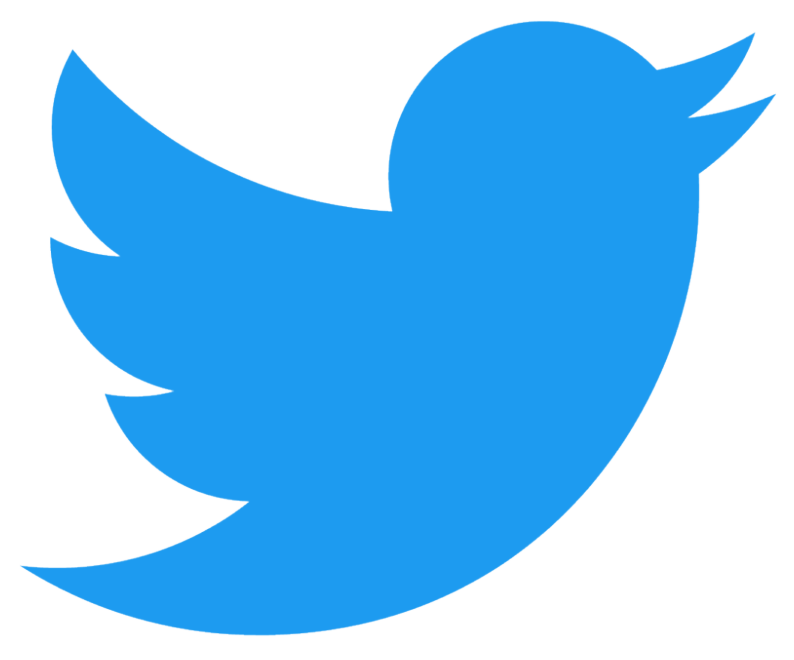

In [24]:
# Import Twitter Logo
image = np.array(Image.open('twitter_logo.png'))
    
fig = plt.figure()
fig.set_figwidth(10) # set the width
fig.set_figheight(12) # set the height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # to display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

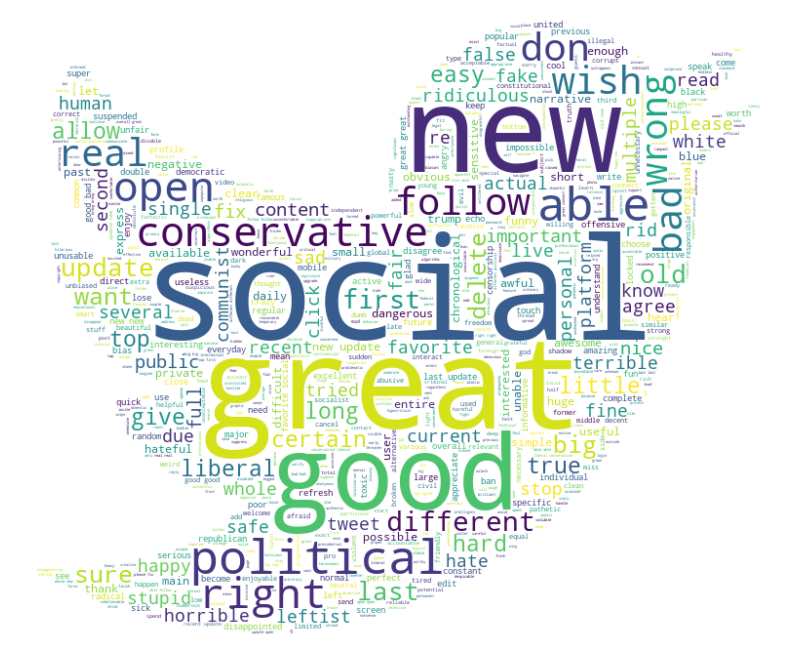

In [25]:
adjectives = df['Adjectives'].tolist()
adjectives = " ".join(adjectives)
wordcloud = WordCloud(mode='RGBA', background_color='white', max_words=1000, mask=image)

# generate the word cloud
wordcloud.generate(adjectives)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(10)  # set width
fig.set_figheight(12)  # set height

plt.imshow(wordcloud, interpolation = 'bilinear') #.recolor(color_func=teal_color_func, random_state=3),
           #interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
wordcloud.to_file("wordcloud.png") #saving the image to a png file

#### Visualising the Sentiments

In [26]:
fig = px.histogram(df, x="Sentiment")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title_text='Twitter App Review Sentiment')
fig.show()

# Building the Model

In [28]:
# Creating the label
df['label'] = df['Sentiment'].map({"Positive": 1, "Negative" : -1, "Neutral" : 0})

In [29]:
#creating a new dataset
model_data = df[['Summary', 'label']]
model_data.head()

,Summary,label
0,refreshing know now someone will stand thanks ...,-1
1,pay verification check longer verification che...,-1
2,going news read reading people piece plus left...,1
3,active social medium presence point past proba...,1
4,update full disclosure abandoned account flood...,-1


In [31]:
#creating a vectorizer and spliting the data into training and testing sets
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(model_data['Summary'])
y = model_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21) #used a test size of 30%

In [32]:
#Fit model on data
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
#Make predictions
predictions = lr.predict(X_test)

In [33]:
# To print the confusion matrix
confusion_matrix(predictions, y_test)

array([[2587,   52,  189],
       [ 153, 1935,  120],
       [ 254,   77, 5847]], dtype=int64)

The above confusion matrix shows that the model performed well in predicting the sentiments of the test reviews based on the training data. however, a classification report will better explain the results of the model

In [34]:
# Printing a classification report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

          -1       0.86      0.91      0.89      2828
           0       0.94      0.88      0.91      2208
           1       0.95      0.95      0.95      6178

    accuracy                           0.92     11214
   macro avg       0.92      0.91      0.91     11214
weighted avg       0.93      0.92      0.92     11214



The model has a 92% accuracy, which shows that the model is good although can be improved. the f1 scores are also close to 1, this also gave credence to how good the model is.

## Note
I used the generated sentiments for the model instead of the individual ratings because after carefully studying the data, i found out that most of the low ratings are due to personal hatred for Elon Musk rather than the workability of twitter, hence why some low scores have positive polarity.

# THANK YOU for your time ❤.